<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/1DeepLearning_Rasm_klassifikatsiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning

## l-qism

### Tayyorgarlik
- Graphics Processing Unit (GPU) ni ishga tushirib olamiz

##GPU to'g'ri ishlayotganligini `torch.cuda.is_available()` orqali tekshiramiz
Natija `True` bo'lishi kerak

In [ ]:
import torch
torch.cuda.is_available()

True

##Kutubxonalarni o'rnatib olamiz
### Bizga kerak bo'ladi
- `fastai==2.7.15` versiyasi
- `torch==2.3.0+cu121` versiyasi

In [1]:
# Kutubxonalarni yuklab olish
import torch
import fastai
# !pip install fastai==2.5.3  kerakli versiyani o'rnatish yangi versiya o'rnatgandan keyin restart runtime qilish kerak bo'ladi

# versiyalarni tekshirish
print(torch.__version__)
print(fastai.__version__)

2.3.0+cu121
2.7.15


##Birinchi modelni quramiz
### Maqsad: Sun'iy Neyron Tarmoqlari yordamida mushuklarni taniy oladigan model qurish
###Model haqida: Biz bu yerda `resnet34` deb nomlangan qariyib 1.3 mln ta rasm yordamida o'qitilgan modeldan foydalanamiz
###Dataset: Oxford-lllT Pet Dataset (`7349` ta mushuk va it larning rasmidan tashkil topgan dataset)

In [2]:
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

#labellovchi funksiya
def is_cat(x): return x[0].isupper()

#datalarni yuklovchi
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

#o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 57.5MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.191138,0.017009,0.992558,00:46


epoch,train_loss,valid_loss,accuracy,time
0,0.048044,0.027245,0.993234,00:48
1,0.025821,0.006846,0.996617,00:51


##Model ishlashini tekshirib ko'ramiz

In [4]:
#rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlilik ehtimolligi: 1.000


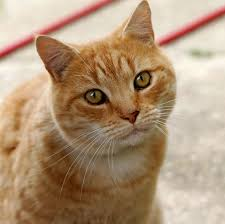

In [21]:
img = PILImage.create(upload.data[-1])  #rasm
pred, _, prob = learn.predict(img)  #Bashorat qilish (predict)
print(f"Mushukmi?: {pred}")
print(f"Aniqlilik ehtimolligi: {prob[1].item():.3f}")  # .3f oxirgi 3 ta raqam aniqlikda chiqarsin
img